<a href="https://colab.research.google.com/github/Birjesh786/All-Ml-DL-Projects/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

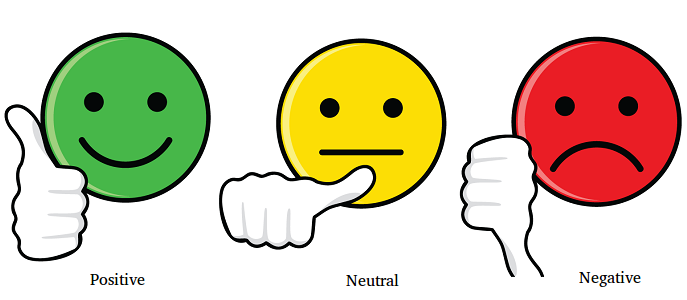

# Import necessary libraries


In [26]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import HTML as html_print
from IPython.display import display
from sklearn.model_selection import GridSearchCV

# Load the dataset

In [2]:
df = pd.read_csv('training.csv')
df.sample(10)

,S.No.,Entity,Sentiment,Comment
39828,5969,HomeDepot,Negative,NaN
370,65,Amazon,Neutral,All The new movie on amazon prime is so funny ...
63870,10827,TomClancysGhostRecon,Positive,Ghost Recon multiplayer is still going epic!. ...
59435,9666,PlayStation5(PS5),Neutral,My own reason for wanting the
72223,12617,WorldOfCraft,Neutral,World of Warcraft on Steam celebrates Nightfal...
74272,12967,Xbox(Xseries),Irrelevant,"At the same time, despite the fact that there ..."
53853,9110,Nvidia,Neutral,My beast trading PC. It ’ s insane and the yes...
55362,9366,Overwatch,Neutral,"""F-follow the Blores of Overwatch..."""
41391,7033,johnson&johnson,Neutral,The Johnson & Johnson Covid-19 vaccine worked ...
64973,11013,TomClancysGhostRecon,Negative,@ GhostRecon How can we fix the Cursor problem...


# Data cleaning and preprocessing

1. Convert text to lowercase
2. Remove special characters

In [3]:
df['Comment'] = df['Comment'].astype(str)
df['Comment'] = df['Comment'].str.lower()
df['Comment'] = df['Comment'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Text vectorization technique : TF-IDF Vectorizer

In [4]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Divide dataset

In [5]:
X = tfidf_vectorizer.fit_transform(df['Comment'])
y = df['Sentiment']

# Encode the target variable

In [6]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Explore data with Visual

### Sentiment Distribution

In [7]:
# Calculate sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Create a pie chart
fig = px.pie(sentiment_counts, names=sentiment_counts.index, title='Sentiment Distribution')
fig.update_traces(textinfo='percent+label', pull=[0, 0.05, 0.1])  # Add percentage labels
fig.show()

### Entity-wise Sentiment

In [8]:
# Calculate sentiment distribution by entity
entity_sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

# Create a stacked bar chart
fig = go.Figure()

for sentiment in entity_sentiment_counts.columns:
    fig.add_trace(go.Bar(
        x=entity_sentiment_counts.index,
        y=entity_sentiment_counts[sentiment],
        name=sentiment
    ))

fig.update_layout(barmode='stack', title='Entity-wise Sentiment Distribution')
fig.update_xaxes(title='Entity')
fig.update_yaxes(title='Count')
fig.show()

### Sentiment Distribution by Entity

In [10]:
# Calculate sentiment distribution by entity
entity_sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

# Create a radar chart
fig = go.Figure()

for sentiment in entity_sentiment_counts.columns:
    fig.add_trace(go.Scatterpolar(
        r=entity_sentiment_counts[sentiment],
        theta=entity_sentiment_counts.index,
        fill='toself',
        name=sentiment
    ))

fig.update_layout(polar=dict(radialaxis=dict(visible=True)),
                  title='Sentiment Distribution by Entity (Radar Chart)')
fig.show()

### Word Cloud for Comments by Sentiment

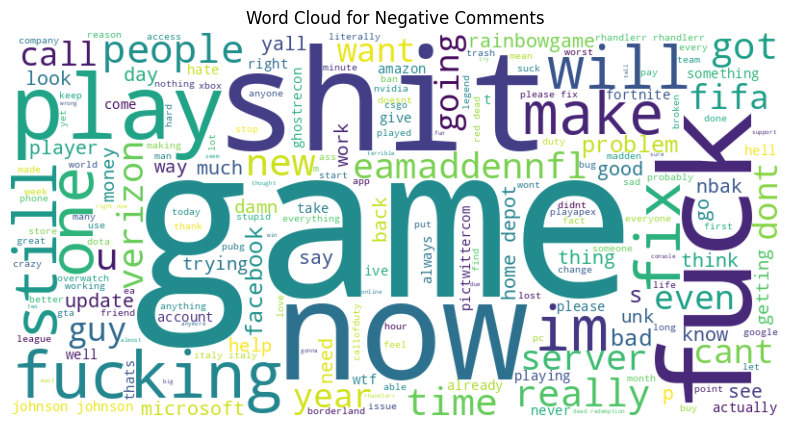

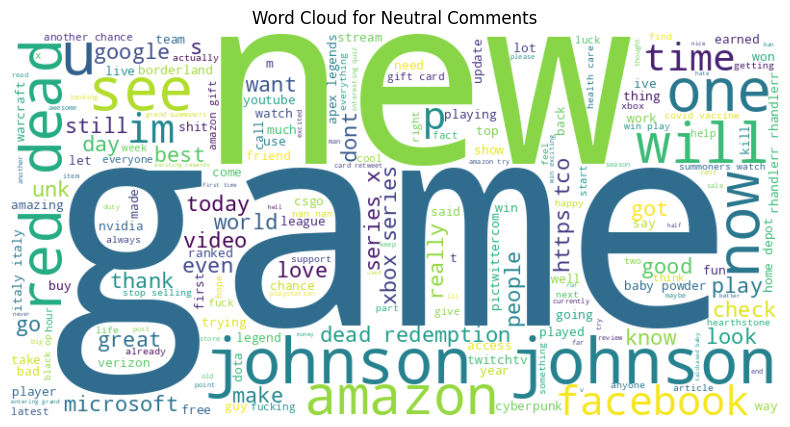

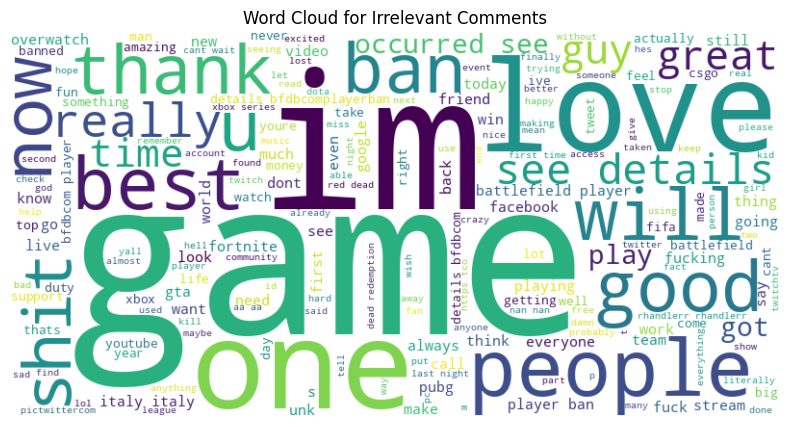

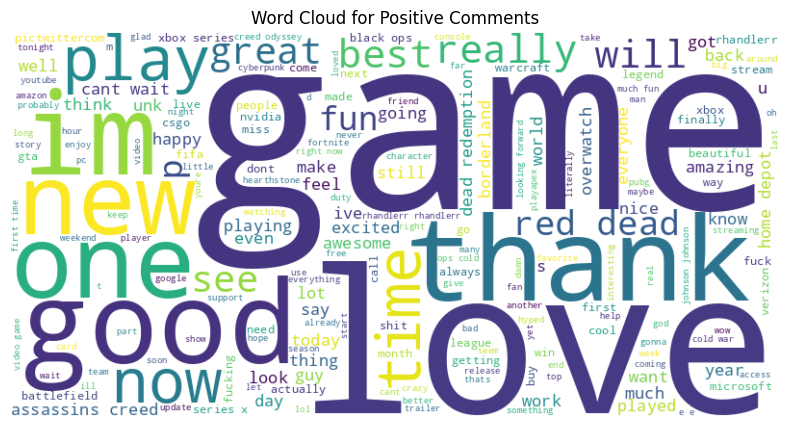

In [11]:
# Generate a Word Cloud for comments in each sentiment category
sentiments = df['Sentiment'].unique()

for sentiment in sentiments:
    comments = df[df['Sentiment'] == sentiment]['Comment']
    comment_text = ' '.join(comments)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comment_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Comments')
    plt.axis('off')
    plt.show()

# It's time to Model building

## Steps:

1. Split the data into training and testing sets
2. Create 5-models

  2.1 Multinomial Naive Bayes

  2.2 Logistic Regression

  2.3 Support Vector Machine
  
  2.4 Decision Tree Classifier

  2.5 Random Forest Classifier

3. Evaluate the models
4. Find best model
5. Create prediction function


#### Step:1

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step:2


In [16]:
# Model 1: MB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

In [17]:
# Model 2: LR
lr_model = LogisticRegression(max_iter=1000)  # Increase the number of iterations
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [18]:
# Model 3: SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [19]:
# Model 4: DTC
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [20]:
# Model 5: RFC
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

#### Step:3


In [21]:
#Classification matrix

print("Multinomial Naive Bayes:")
print(classification_report(y_test, nb_preds))

print("---------------------------------------------------")

print("Logistic Regression:")
print(classification_report(y_test, lr_preds))

print("---------------------------------------------------")

print("Support Vector Machine:")
print(classification_report(y_test, svm_preds))

print("---------------------------------------------------")

print("Decision Tree Classifier:")
print(classification_report(y_test, dt_preds))

print("---------------------------------------------------")


print("Random Forest Classifier:")
print(classification_report(y_test, rf_preds))

Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.60      0.22      0.32      2657
           1       0.55      0.74      0.63      4548
           2       0.55      0.46      0.50      3695
           3       0.55      0.64      0.59      4237

    accuracy                           0.55     15137
   macro avg       0.56      0.52      0.51     15137
weighted avg       0.56      0.55      0.53     15137

---------------------------------------------------
Logistic Regression:
              precision    recall  f1-score   support

           0       0.52      0.36      0.43      2657
           1       0.64      0.67      0.66      4548
           2       0.55      0.49      0.52      3695
           3       0.55      0.68      0.61      4237

    accuracy                           0.57     15137
   macro avg       0.57      0.55      0.55     15137
weighted avg       0.57      0.57      0.57     15137

--------------------------------

#### Step:4


In [22]:
# Create a dictionary to store model names and their accuracy scores
models = {
    'Multinomial Naive Bayes': nb_model,
    'Logistic Regression': lr_model,
    'Support Vector Machine': svm_model,
    'Decision Tree Classifier': dt_model,
    'Random Forest Classifier': rf_model
}

In [23]:
best_model_name = None
best_accuracy = 0

In [24]:
for model_name, model in models.items():
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)

    print(f"{model_name} Accuracy: {accuracy}")

    # Update the best model if the current model has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_name

Multinomial Naive Bayes Accuracy: 0.5538085485895488
Logistic Regression Accuracy: 0.5749488009513114
Support Vector Machine Accuracy: 0.8230825130474995
Decision Tree Classifier Accuracy: 0.753451806830944
Random Forest Classifier Accuracy: 0.8199114751932352


In [25]:
print(f"The best model is: {best_model_name} with accuracy {best_accuracy}")

The best model is: Support Vector Machine with accuracy 0.8230825130474995


#### Step:5


In [30]:
# Create word lists for sentiment categories
positive_words = ['happy', 'excellent', 'great', 'wonderful', 'joyful', 'delightful']
negative_words = ['terrible', 'disappointing', 'unpleasant', 'frustrating', 'awful', 'horrible']
neutral_words = ['okay', 'average', 'normal', 'typical', 'routine', 'indifferent']

In [31]:
# Print the word lists
print("Positive Words:", positive_words)
print("Negative Words:", negative_words)
print("Neutral Words:", neutral_words)

Positive Words: ['happy', 'excellent', 'great', 'wonderful', 'joyful', 'delightful']
Negative Words: ['terrible', 'disappointing', 'unpleasant', 'frustrating', 'awful', 'horrible']
Neutral Words: ['okay', 'average', 'normal', 'typical', 'routine', 'indifferent']


In [32]:
def predict_and_highlight_sentiment_with_category(input_text, model):
    # Preprocess the input text
    input_text = input_text.lower()
    input_text_clean = re.sub(r'[^a-zA-Z\s]', '', input_text)  # Cleaned text for highlighting

    # Vectorize the input text using the same TF-IDF vectorizer used during training
    input_vector = tfidf_vectorizer.transform([input_text_clean])

    # Predict the sentiment using the selected model
    sentiment_label = label_encoder.inverse_transform(model.predict(input_vector))[0]

    # Add emojis based on sentiment
    emojis = {
        'Positive': '😄',
        'Negative': '😞',
        'Neutral': '😐'
    }
    sentiment_emoji = emojis.get(sentiment_label, '🤔')  # Default emoji for unknown sentiment

    # Create word lists for each sentiment category
    sentiment_keywords = {
        'Positive': positive_words,
        'Negative': negative_words,
        'Neutral': neutral_words
    }

    # Initialize HTML code for highlighting
    highlighted_text = input_text_clean

    # Initialize a dictionary to store the categories of highlighted words
    highlighted_categories = {}

    # Highlight words in the text with different colors based on sentiment and store their categories
    for keyword in sentiment_keywords:
        for word in sentiment_keywords[keyword]:
            if word in highlighted_text:
                highlighted_text = highlighted_text.replace(word, f"<span style='color:green'>{word}</span>")
                highlighted_categories[word] = keyword

    # Create HTML code for displaying the text with colors and emojis
    if sentiment_label == 'Negative':
        display_color = 'red'
    elif sentiment_label == 'Neutral':
        display_color = 'darkgray'
    else:
        display_color = 'black'

    # Create the prediction result with HTML formatting
    prediction_result = (
        f"<p style='color:{display_color}'>Predicted Sentiment: {sentiment_label} {sentiment_emoji}</p><br>" + highlighted_text
    )

    # Add categories of highlighted words to the prediction result
    for word, category in highlighted_categories.items():
        prediction_result += f"<p>{word}: {category}</p>"

    # Display the prediction result with HTML formatting
    display(html_print(prediction_result))

In [35]:
# Example usage with a paragraph as input:
user_paragraph = """

The world is facing a number of serious problems, including climate change, poverty, and inequality. These problems are all complex and interconnected, and they pose a significant threat to our future. If we do not take action to address these problems, they will only get worse.




"""
predict_and_highlight_sentiment_with_category(user_paragraph, svm_model)